**Import Packages**

In [0]:
%tensorflow_version 2.x
!pip install -q tf-hub-nightly==0.8.0.dev201911110007
!pip install -q git+https://github.com/tensorflow/examples

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow_examples.lite.model_customization.core.data_util.image_dataloader import ImageClassifierDataLoader
from tensorflow_examples.lite.model_customization.core.task import image_classifier
from tensorflow_examples.lite.model_customization.core.task.model_spec import efficientnet_b0_spec
from tensorflow_examples.lite.model_customization.core.task.model_spec import ImageModelSpec

import matplotlib.pyplot as plt

     |████████████████████████████████| 92kB 3.4MB/s 


**Mount Google Drive and go to Directory**

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [0]:
%ls
%cd My\ Drive
%cd RecycleSort/

**Load Image Data**

In [0]:
data = ImageClassifierDataLoader.from_folder('recyclesort_dataset/')

INFO:tensorflow:Load image with size: 2527, num_label: 6, labels: cardboard, glass, metal, paper, plastic, trash.


**Visualize Images**

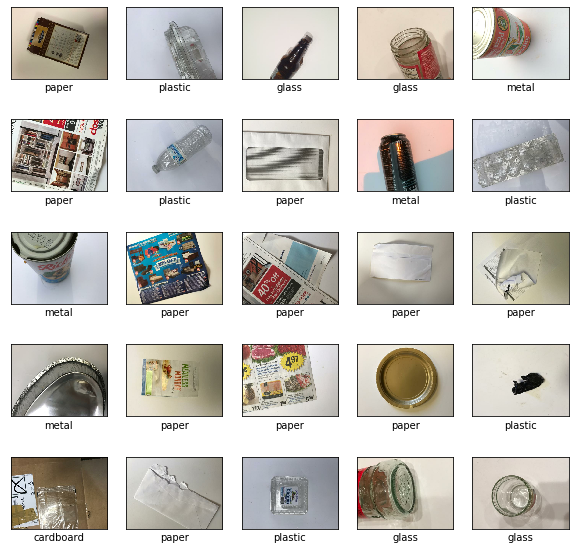

In [0]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.dataset.take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

**Train the Classifier (EfficientNet or MobileNet)**

In [7]:
model = image_classifier.create(data, model_spec=efficientnet_b0_spec, epochs=15)
#model = image_classifier.create(data, epochs=15)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  4049564   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  7686      
Total params: 4,057,250
Trainable params: 7,686
Non-trainable params: 4,049,564
_________________________________________________________________
None
INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Train for 63 steps, validate for 7 steps
Epoch 1/15
63/63 [==============================] - 375s 6s/step - loss: 1.1519 - accuracy: 0.6354 - val_loss: 0.8755 - val_accuracy: 0.8080
Epoch 2/15
63/63 [==============================] - 13s 204ms/step - loss: 0.7869 - accuracy: 0.8507 - val_loss: 0.8160 - val_accuracy: 0.8259
Epoch 3/15
63/63 [==============================] - 13s 202ms/step - loss: 0.7298 - accuracy: 0.8695 - val_loss: 0.7865 - val_accuracy: 0.8348
Epoch 4/15
63/63 [==============================] - 13s 204ms/step - loss: 0.7066 - accuracy: 0.8889 - val_loss: 0.7695 - val_accuracy: 0.8482
Epoch 5/15
63/63 [==============================] - 13s 205ms/step - loss: 0.6846 - accuracy: 0.8919 - val_loss: 0.7575 - val_accuracy: 0.8527
Epoch 6/15
63/63 [==============================] - 13s 205ms/step - loss: 0.6648 - accuracy: 0.9072 - val_loss: 0.7495 - val_accuracy: 0.8438
Epoch 7/15
63/63 [==============================] - 13s 210ms/step - loss: 0.6487 - accuracy: 0.9182 - 

**Evaluate the Model**

In [8]:
loss, accuracy = model.evaluate()

8/8 [==============================] - 2s 226ms/step - loss: 0.7045 - accuracy: 0.9048


**Visualize Inference**

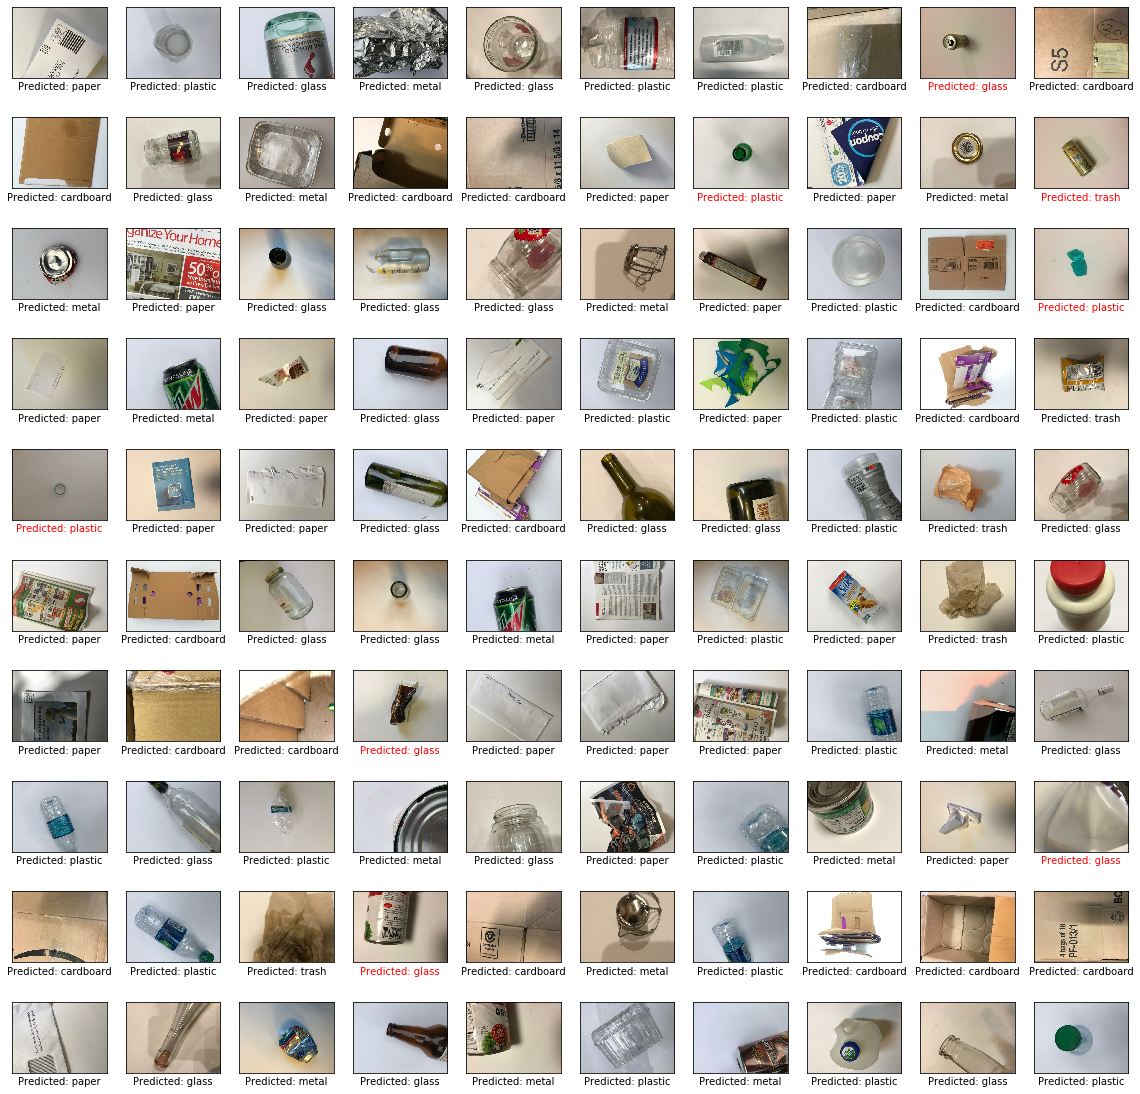

In [9]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_topk(model.test_data)
for i, (image, label) in enumerate(model.test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          model.test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

**Save the Model**

In [11]:
model.export('recyclesort_classifier_v3.tflite', 'recyclesort_labels.txt')

INFO:tensorflow:Export to tflite model recyclesort_classifier_v3.tflite, saved labels in recyclesort_labels.txt.


INFO:tensorflow:Export to tflite model recyclesort_classifier_v3.tflite, saved labels in recyclesort_labels.txt.
